<a href="https://colab.research.google.com/github/ocalzada/DS-Unit-2-Applied-Modeling/blob/master/module1/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [X] Determine whether your problem is regression or classification.
- [X] Choose your evaluation metric.
- [X] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [X] Begin to clean and explore your data.
- [X] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading

### ROC AUC
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

### Imbalanced Classes
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)

### Last lesson
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [0]:
# target = monthly mean temperature anomaly in degrees Celsius

# my goal will be to forecast future monthly mean temp anomalies based on 
# historical data for this same variable

# this will be a regression problem

# metric will be mse, rmse, mae

In [9]:
from google.colab import files

uploaded = files.upload()

Saving monthly_csv (2).csv to monthly_csv (2).csv


In [0]:
import pandas as pd

df = pd.read_csv('monthly_csv (2).csv')

df = df[['Date', 'Mean']]

In [0]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [0]:
df = df.rename(columns={'Date':'ds', 'Mean': 'y'})

df

In [0]:
cutoff = pd.to_datetime('1980-01-01')

train = df[df.ds < cutoff]
test = df[df.ds > cutoff]

In [20]:
!pip install fbprophet

In [28]:
from fbprophet import Prophet

m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=360)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2755,1980-11-26,-0.258041,-0.443087,-0.084173
2756,1980-11-27,-0.241729,-0.422679,-0.053344
2757,1980-11-28,-0.221686,-0.394476,-0.041486
2758,1980-11-29,-0.198129,-0.380353,-0.014956
2759,1980-11-30,-0.171331,-0.341646,0.015235


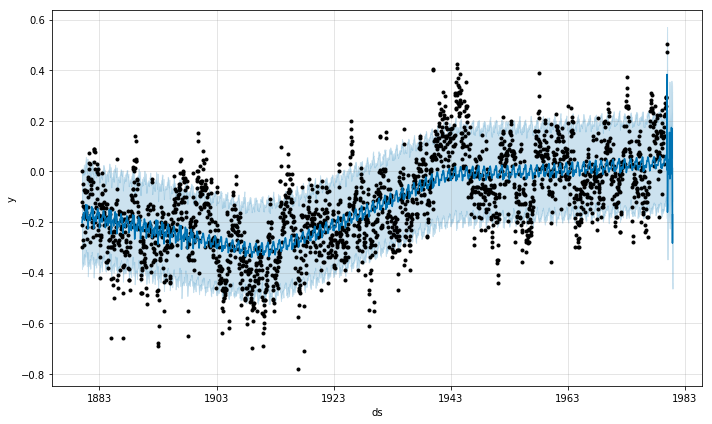

In [29]:
fig1 = m.plot(forecast)

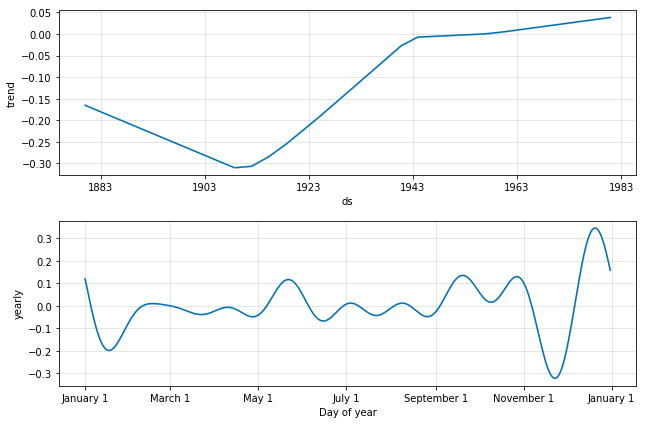

In [30]:
fig2 = m.plot_components(forecast)

In [32]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='360 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 195 forecasts with cutoffs between 1883-05-03 00:00:00 and 1978-12-11 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,36 days,0.024391,0.156176,0.122155,0.731174
1,37 days,0.024356,0.156063,0.122032,0.730555
2,38 days,0.024909,0.157825,0.123214,0.723292
3,39 days,0.024542,0.156660,0.122325,0.723563
4,40 days,0.024452,0.156371,0.122630,0.721529
